<a href="https://colab.research.google.com/github/jsegovia1984/Informe2024-2S/blob/main/MPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas openpyxl
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/MPF"
filename = '/content/drive/My Drive/MPF/1_Vistas_Ingresadas_Evacuadas.xlsx'
df = pd.read_excel(filename, engine='openpyxl').sort_values(by='Orden', ascending=True)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
1_Vistas_Ingresadas_Evacuadas.xlsx  MPF.ipynb  unificado.xlsx


In [5]:
print(df.columns)


Index(['Orden', 'Semestre', 'Provincia', 'Jurisdicción', 'Fuero', 'Instancia',
       'Código', 'Dependencia', 'Materia', 'Vistas Ingresadas'],
      dtype='object')


# Cantidad de Vistas Ingresadas en los ultimos 3 semestres  - Pagina 25

In [6]:

# Agrupa por Semestre y suma las vistas ingresadas
vistas_semestres = df.groupby('Orden')['Vistas Ingresadas'].sum().astype(int)
#vistas_semestres = vistas_semestres.sort_index()
vistas_semestres_pivot = vistas_semestres.to_frame() # Convierte a DataFrame
vistas_semestres_pivot.columns = [''] # Cambia el nombre de columna a vacío# Convierte el resultado a un DataFrame con los semestres como columnas
vistas_semestres_pivot = vistas_semestres.to_frame().T  # Transpone el DataFrame
# Elimina el índice para que no aparezca como la primera columna

vistas_semestres_pivot.index = ['']
# Estilo para añadir un título que ocupe todas las columnas
vistas_semestres_styled = vistas_semestres_pivot.style.set_caption("**Vistas Ingresadas por Semestre**")\
    .set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center; font-weight: bold; border: 1px solid black;'},
        {'selector': 'thead th', 'props': 'text-align: center; font-weight: bold; border: 1px solid black;'},
        {'selector': 'table', 'props': 'width: 100%; border-collapse: collapse;'},  # Use collapse instead of solid
        {'selector': 'caption', 'props': 'text-align: center; font-size: 1.2em; font-weight: bold;'},
        {'selector': 'td', 'props': 'border: 1px solid black;'} # Add border to table cells

    ])\
    .set_properties(**{'text-align': 'center'})


vistas_semestres_styled.to_excel('1_vistas_ingresadas_3_semestres.xlsx', index=False)
vistas_semestres_styled



Orden,1,2,3
,102543,111569,113409


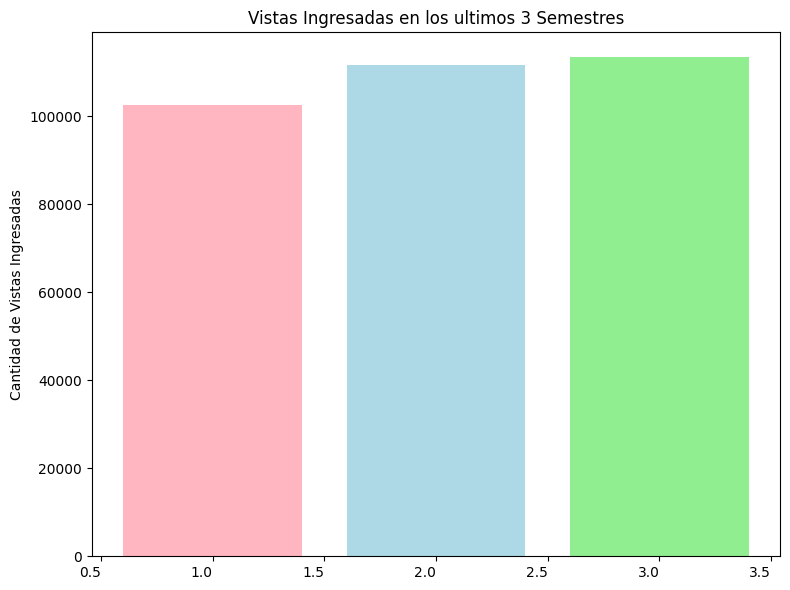

In [7]:

import matplotlib.pyplot as plt

# Datos de ejemplo (reemplaza con tus datos reales)
semestres = vistas_semestres.index
vistas = vistas_semestres.values

# Colores pastel
colores = ['#FFB6C1', '#ADD8E6', '#90EE90']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura si es necesario
plt.bar(semestres, vistas, color=colores)

# Personalizar el gráfico
plt.ylabel('Cantidad de Vistas Ingresadas')
plt.title('Vistas Ingresadas en los ultimos 3 Semestres')
plt.xticks(rotation=0, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout() # Ajusta el gráfico para que no se corte
plt.show()

In [8]:
# funcion para crear las tablas y sus variaciones semestrales

def tabla(pivot_table,name):
    all_semestres = df['Semestre'].unique()

    latest_semester = all_semestres[-1]
    pivot_table['Total'] = pivot_table[latest_semester]

    variacion_df = pivot_table.apply(lambda row: ((row[latest_semester]- row)/ row*100 ), axis=1).round(0)
    variacion_df = variacion_df.drop(columns=[latest_semester, 'Total'])  # Remove latest semester and Total from variation
    variacion_df = variacion_df.add_suffix(' (%)')  # Add "%" to column names

    final_table = pd.concat([pivot_table[['Total']], variacion_df], axis=1)

    final_table = final_table.sort_values(by=['Total'], ascending=False)

    total_general_row = pd.DataFrame({'Total': [final_table['Total'].sum()]}, index=['Total General'])

    final_table = pd.concat([final_table, total_general_row])


    cols = list(final_table.columns)
    cols[-2], cols[-1] = cols[-1], cols[-2]
    final_table = final_table[cols]

    final_table.to_excel(name)
# Display the table
    print(final_table.to_string())

**VISTAS INGRASADAS POR JURISDICCION** Pagina 26

In [9]:
all_semestres_data = df.groupby(['Jurisdicción', 'Semestre'])['Vistas Ingresadas'].sum().reset_index()
#print(all_semestres_data)

pivot_table = all_semestres_data.pivot(index='Jurisdicción', columns='Semestre', values='Vistas Ingresadas').fillna(0)

tabla(pivot_table,'2_vistas_por_jurisficcion_distrito.xlsx')


                     Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
CABA                 80927              -2.0               9.0
Córdoba               4209              12.0              11.0
Rosario               3927               7.0              -3.0
La Plata              3701              16.0              20.0
Mendoza               3571              37.0              59.0
San Martín            3445              -1.0              17.0
General Roca          2076              -2.0              12.0
Salta                 1922               9.0               9.0
Mar del Plata         1907              24.0              31.0
Bahía Blanca          1722               2.0              26.0
Comodoro Rivadavia    1673              -5.0              20.0
Paraná                1557              27.0              11.0
Tucumán               1417              50.0              26.0
Posadas                573              14.0             -29.0
Corrientes             423              67.0           

In [10]:


all_semestres_data = df.groupby(['Provincia', 'Semestre'])['Vistas Ingresadas'].sum().reset_index()
#print(all_semestres_data)

pivot_table = all_semestres_data.pivot(index='Provincia', columns='Semestre', values='Vistas Ingresadas').fillna(0)

tabla(pivot_table,'3_vistas_por_Provincia.xlsx')



                                  Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
Ciudad Autonoma de Buenos Aires   80927              -2.0               9.0
Buenos Aires                      10760               9.0              21.0
Cordoba                            4077              10.0              11.0
Santa Fe                           3800               4.0              -1.0
Mendoza                            1873              49.0              38.0
Salta                              1575              13.0              11.0
Entre Rios                         1557              27.0              11.0
San Juan                           1418              30.0             119.0
Rio Negro                          1090             -26.0               9.0
Neuquen                             986              51.0              15.0
Tucuman                             897              75.0              20.0
Chubut                              838             -21.0              18.0
Misiones    

**VISTAS INGRESADAS POR PROVINCIA** Pagina 28

**Vistas Ingreadas CABA por Fuero** Pagina 29

In [11]:

all_semestres_data = df[df['Jurisdicción'] == 'CABA'].groupby(['Fuero', 'Semestre'])['Vistas Ingresadas'].sum().reset_index()

pivot_table = all_semestres_data.pivot(index='Fuero', columns='Semestre', values='Vistas Ingresadas').fillna(0)

name = '4_vistas_por_Fuero.xlsx'
tabla(pivot_table,name)


                                Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
Nac. Civ. y Com.                37567              -4.0              14.0
Fed. Civ., Com. y Cont. Admin.  22511               9.0              32.0
Fed. de la Seg. Social          11212              -5.0             -20.0
Nac. de Trabajo                  8557             -13.0              -7.0
Electoral                        1080               1.0               5.0
Total General                   80927               NaN               NaN


# Vistas Ingresadas por dependencia Agrupadas por Jurisficcion
Bahia Blanca - Pagina 31

In [12]:
jurisdicciones_interior = df[df['Jurisdicción'] != 'CABA']
Jurisdicciones = jurisdicciones_interior['Jurisdicción'].unique()

for jurisdiccion in Jurisdicciones:
    all_semestres_data = df[df['Jurisdicción'] == jurisdiccion].groupby(['Semestre','Dependencia'])['Vistas Ingresadas'].sum().reset_index()
    pivot_table = all_semestres_data.pivot(index='Dependencia', columns='Semestre', values='Vistas Ingresadas').fillna(0)
    name = f'{jurisdiccion}_vistas_ingresadas.xlsx'
    print()
    print(jurisdiccion)
    tabla(pivot_table,name)
    print("-"*100)


Rosario
                                                     Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
Fisc. Fed. Nº 1 de Santa Fe                          852.0               5.0              -3.0
Unidad Fiscal Rosario                                517.0               inf               inf
Unidad Fiscal Santa Fe                               442.0               inf               inf
Fisc. Fed. Nº 3 de Rosario                           438.0             -51.0             -50.0
Fisc. Fed. Nº 2 de Rosario                           408.0              10.0             -30.0
Fisc. Fed. Nº 2 de Santa Fe                          380.0             -30.0             -18.0
Fisc. Fed. Nº 1 de Rosario                           282.0             -49.0             -56.0
Fisc. Fed. de Rafaela                                252.0              -4.0              12.0
Fisc. Fed. de San Nicolás                            141.0              -6.0             -56.0
Sede Fiscal Descent. de Rafaela          

# Cantidad de vistas por fiscalias agrupadas por Fuero

In [13]:
jurisdicciones_interior = df[df['Jurisdicción'] == 'CABA']
fueros = jurisdicciones_interior['Fuero'].unique()

for fuero in fueros:
    all_semestres_data = df[df['Fuero'] == fuero].groupby(['Semestre','Dependencia'])['Vistas Ingresadas'].sum().reset_index()
    pivot_table = all_semestres_data.pivot(index='Dependencia', columns='Semestre', values='Vistas Ingresadas').fillna(0)
    name = f'{fuero}_vistas_ingresadas.xlsx'
    print()
    print(fuero + " - AMBA")
    tabla(pivot_table,name)
    print("-"*100)


Electoral - AMBA
                                               Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
Fisc. en lo Criminal y Correccional Fed. Nº 1   1080               1.0               5.0
Total General                                   1080               NaN               NaN
----------------------------------------------------------------------------------------------------

Nac. de Trabajo - AMBA
                                                    Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
Fisc. Gral. ante la Cám. Nac. de Apel. del Trabajo   1284             -31.0             -10.0
Fisc. Nac. del Trabajo Nº 4                          1223             -11.0             -12.0
Fisc. Nac. del Trabajo Nº 3                          1179               4.0               7.0
Fisc. Nac. del Trabajo Nº 1                          1090              -6.0              -0.0
Fisc. Nac. del Trabajo Nº 8                           988              -3.0              -5.0
Fisc. Nac. del Trabajo Nº 

**Vistas Ingresadas por Instancia a nivel pais** -Pagina 41




In [17]:
all_semestres_data = df.groupby(['Instancia', 'Semestre'])['Vistas Ingresadas'].sum().reset_index()
#print(all_semestres_data)

pivot_table = all_semestres_data.pivot(index='Instancia', columns='Semestre', values='Vistas Ingresadas').fillna(0)

tabla(pivot_table,'6_vistas_Instancia.xlsx')

                Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
1° Inst.       101898               1.0               8.0
2° Inst.        11511              10.0              37.0
Total General  113409               NaN               NaN


**Vistas Ingresadas por Instancia en CABA - Pagina 42**

In [19]:
amba = df[df['Jurisdicción'] == 'CABA']

all_semestres_data = amba.groupby(['Instancia', 'Semestre'])['Vistas Ingresadas'].sum().reset_index()
#print(all_semestres_data)

pivot_table = all_semestres_data.pivot(index='Instancia', columns='Semestre', values='Vistas Ingresadas').fillna(0)

tabla(pivot_table,'7_vistas_Instancia_amba.xlsx')

               Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
1° Inst.       72422              -4.0               6.0
2° Inst.        8505              15.0              38.0
Total General  80927               NaN               NaN


# **Vistas Ingresadas por Instancia en Interior - Pagina 43






In [22]:
interior = df[df['Jurisdicción'] != 'CABA']

all_semestres_data = interior.groupby(['Instancia', 'Semestre'])['Vistas Ingresadas'].sum().reset_index()
#print(all_semestres_data)

pivot_table = all_semestres_data.pivot(index='Instancia', columns='Semestre', values='Vistas Ingresadas').fillna(0)

tabla(pivot_table,'8_vistas_Instancia_interior.xlsx')

               Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
1° Inst.       29476              14.0              14.0
2° Inst.        3006              -1.0              33.0
Total General  32482               NaN               NaN


**Vistas Ingresadas por materia a nivel pais - Pagina 44**

In [23]:

all_semestres_data = df.groupby(['Materia', 'Semestre'])['Vistas Ingresadas'].sum().reset_index()
#print(all_semestres_data)

pivot_table = all_semestres_data.pivot(index='Materia', columns='Semestre', values='Vistas Ingresadas').fillna(0)

tabla(pivot_table,'9_vistas_Materia_pais.xlsx')

                    Total  2° Sem. 2023 (%)  1° Sem. 2023 (%)
Civ.                32255              -6.0              13.0
ECiv. Fed.          28082               3.0              14.0
Civ. y Com. Fed.    14708              27.0              60.0
Seg. Social         11194              -5.0             -20.0
Trabajo              8621             -12.0              -6.0
Cont. Admin. Fed.    8122             -10.0               2.0
Electoral Civ.       5426              89.0              18.0
Com.                 4944               4.0              14.0
Penal                  33             -55.0             -34.0
Sin datos              23             -49.0             -18.0
Electoral               1               0.0             -80.0
Total General      113409               NaN               NaN


# Dictamenes emitidos en el segundo semestre de 2024 - Pagina 50

In [26]:
# Ejemplo de unificacion de dos archivos

import pandas as pd

# Define the filenames of the Excel files
file1 = '/content/vistas_ingresadas_3_semestres.xlsx'
file2 = '/content/vistas_por_instancia_caba.xlsx' # Replace with the actual path to your second file

# Create an empty dictionary to store the dataframes
dfs = {}

# Read the first excel file and add it to the dictionary
try:
    dfs['vistas_ingresadas_3_semestres'] = pd.read_excel(file1, engine='openpyxl') # Assumes the first sheet is named 'Sheet1'
except FileNotFoundError:
    print(f"Error: File '{file1}' not found.")
    # Handle the error appropriately, e.g. exit or use a default dataframe
    exit()

# Read the second excel file and add it to the dictionary
try:
  dfs['vistas_por_instancia_caba'] = pd.read_excel(file2, engine='openpyxl') # Assumes the first sheet is named 'Sheet2'
except FileNotFoundError:
  print(f"Error: File '{file2}' not found.")
  #Handle the error
  exit()
except Exception as e: #Catch other potential errors during file reading
  print(f"An error occurred while reading {file2}: {e}")
  exit()


# Create a Pandas ExcelWriter object
with pd.ExcelWriter('combined_excel.xlsx', engine='openpyxl') as writer:
    # Iterate through the dictionary and write each dataframe to a separate sheet
    for sheet_name, df in dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print("Combined Excel file 'combined_excel.xlsx' created successfully!")

Error: File '/content/vistas_ingresadas_3_semestres.xlsx' not found.
Combined Excel file 'combined_excel.xlsx' created successfully!


codigo para darle estilo a las hojas de calculo

In [ ]:
from openpyxl import load_workbook
from openpyxl.styles import Font, Alignment, Border, Side, PatternFill

def aplicar_formato_excel(ruta_archivo):
    # Abrir el archivo de Excel
    wb = load_workbook(ruta_archivo)

    # Definir estilos
    header_font = Font(bold=True, color="FFFFFF")
    header_fill = PatternFill(start_color="4F81BD", end_color="4F81BD", fill_type="solid")
    border = Border(
        left=Side(style="thin"),
        right=Side(style="thin"),
        top=Side(style="thin"),
        bottom=Side(style="thin")
    )
    alignment = Alignment(horizontal="center", vertical="center", wrap_text=True)

    # Iterar sobre cada hoja
    for sheet in wb.sheetnames:
        ws = wb[sheet]
        if ws.max_row > 1 and ws.max_column > 1:  # Asegurarse de que hay datos
            # Aplicar formato a la fila de encabezado
            for col in range(1, ws.max_column + 1):
                cell = ws.cell(row=1, column=col)
                cell.font = header_font
                cell.fill = header_fill
                cell.alignment = alignment
                cell.border = border

            # Aplicar bordes y alineación al resto de las celdas
            for row in range(2, ws.max_row + 1):
                for col in range(1, ws.max_column + 1):
                    cell = ws.cell(row=row, column=col)
                    cell.alignment = alignment
                    cell.border = border

            # Ajustar el ancho de las columnas
            for col in ws.columns:
                max_length = 0
                col_letter = col[0].column_letter
                for cell in col:
                    try:
                        if cell.value:
                            max_length = max(max_length, len(str(cell.value)))
                    except:
                        pass
                ws.column_dimensions[col_letter].width = max_length + 2

    # Guardar los cambios en un nuevo archivo
    nuevo_archivo = "archivo_formateado.xlsx"
    wb.save(nuevo_archivo)
    print(f"Archivo formateado guardado como {nuevo_archivo}")

# Ruta al archivo Excel original
ruta_archivo = "archivo.xlsx"
aplicar_formato_excel(ruta_archivo)
